## Inferential Statistics

### Import Data Library

In [209]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#For Latex Equations
from IPython.display import Math, Latex
#Displaying Images
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc = {'figure.figsize' : (5,5)})
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

### Data Processing 

In [171]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [172]:
#Print how many rows and columns inside the data
print(df.shape)

(84548, 22)


In [173]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [174]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [175]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [176]:
df.replace(' ', np.nan, inplace = True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       83810 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                19052 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

In [178]:
df.drop(columns = ['EASE-MENT'], inplace = True)

In [179]:
#Mengidentifikasi kolom object
print(df.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [180]:
#Mengidentifikasi kolom int
print(df.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [181]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "Staten Island")

In [182]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [183]:
df.isnull().sum()/len(df)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.872877
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.872877
ADDRESS                            0.000000
APARTMENT NUMBER                  77.466055
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                   0.000000
GROSS SQUARE FEET                  0.000000
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE DATE                          0.000000
dtype: float64

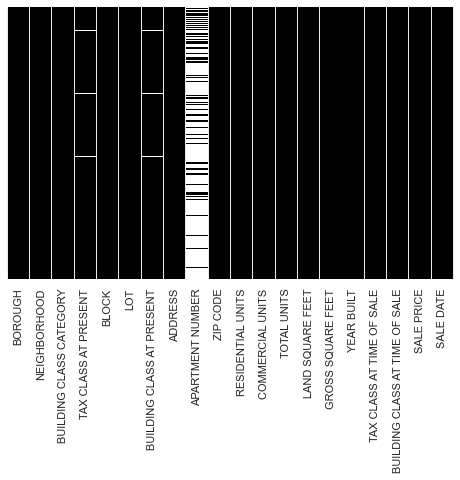

In [184]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [185]:
df = df.dropna()

In [186]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [187]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
73,Manhattan,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,RR,254 EAST 2ND STREET,RES,10009,47,0,47,-,36472,2005,2,RR,28000000,2016-10-13 00:00:00
75,Manhattan,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,RR,250 EAST HOUSTON STREET,UNIT1,10002,132,0,132,33650,-,1989,2,RR,52625000,2016-10-19 00:00:00
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,1B,10009,1,0,1,-,-,0,2,R2,620000,2016-12-30 00:00:00
77,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398,1039,R2,182 EAST 2ND STREET,6E,10009,1,0,1,-,-,0,2,R2,-,2017-02-24 00:00:00
78,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,405,1211,R2,511 EAST 11TH STREET,C3,10009,1,0,1,-,-,0,2,R2,-,2017-07-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84412,Staten Island,WILLOWBROOK,44 CONDO PARKING,4,1965,1154,RG,1235 FOREST HILL ROAD,P31,10314,0,0,1,-,-,2015,4,RG,-,2017-06-01 00:00:00
84413,Staten Island,WILLOWBROOK,44 CONDO PARKING,4,1965,1157,RG,1235 FOREST HILL ROAD,P34,10314,0,0,1,-,-,2015,4,RG,-,2017-04-03 00:00:00
84414,Staten Island,WILLOWBROOK,44 CONDO PARKING,4,1965,1158,RG,1235 FOREST HILL ROAD,P35,10314,0,0,1,-,-,2015,4,RG,-,2017-04-28 00:00:00
84415,Staten Island,WILLOWBROOK,44 CONDO PARKING,4,1965,1159,RG,1235 FOREST HILL ROAD,P36,10314,0,0,1,-,-,2015,4,RG,-,2017-04-24 00:00:00


### Mean 

In [188]:
mean = pd.DataFrame(df.groupby('BOROUGH')['TOTAL UNITS'].mean().sort_values(ascending=False))
mean

,TOTAL UNITS
BOROUGH,
Brooklyn,2.079888
Bronx,1.421384
Queens,1.265800
Manhattan,1.064482
Staten Island,1.016892


Text(0, 0.5, 'Lokasi Unit')

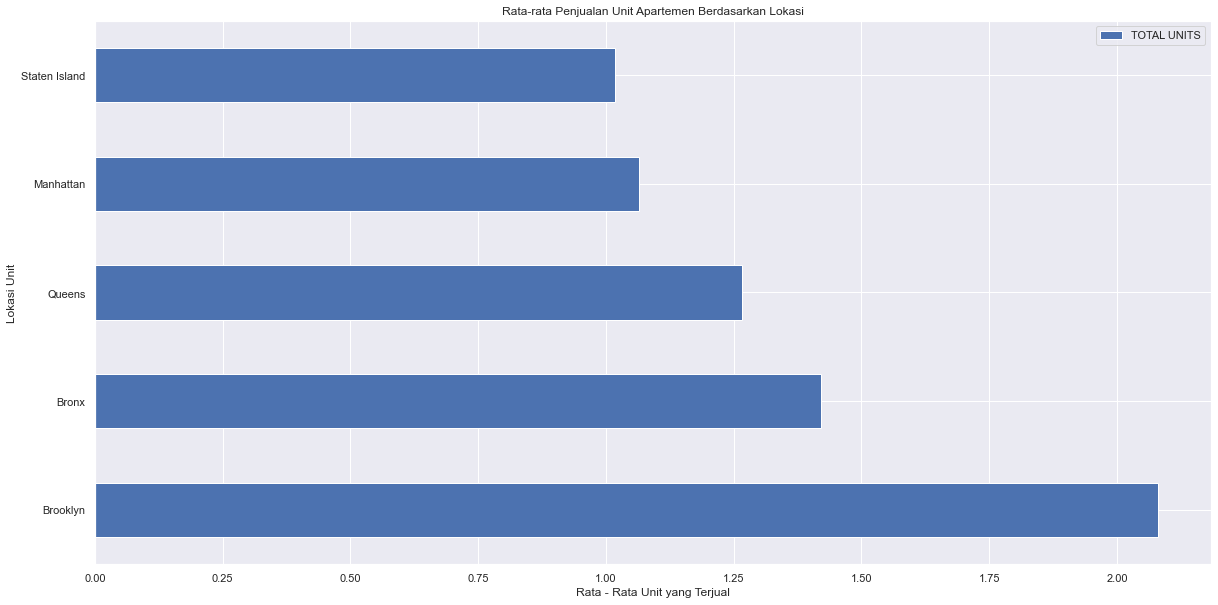

In [189]:
mean.plot(kind = "barh", figsize = (20,10))
plt.title("Rata-rata Penjualan Unit Apartemen Berdasarkan Lokasi")
plt.xlabel("Rata - Rata Unit yang Terjual")
plt.ylabel("Lokasi Unit")

Brooklyn merupakan wilayah unit yang terjual terbanyak, diikuti dengan Bronx, dan Queens.

### Median 

Text(0, 0.5, 'Wilayah')

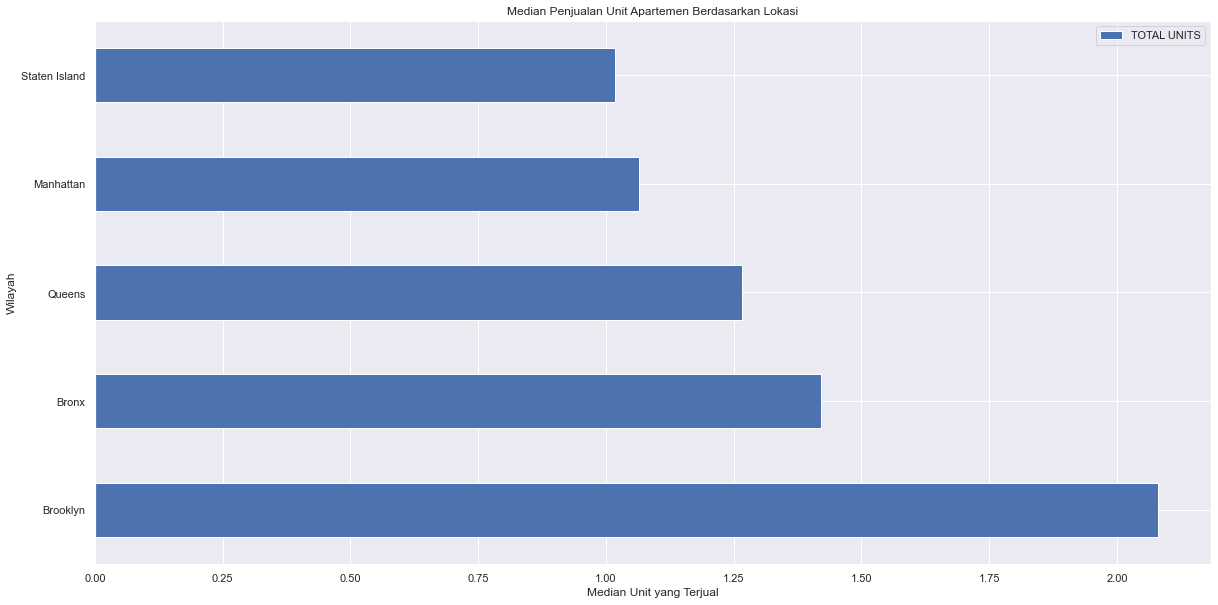

In [235]:
median = pd.DataFrame(df.groupby('BOROUGH')['TOTAL UNITS'].mean().sort_values(ascending=False))
median.plot(kind = "barh", figsize = (20,10))
plt.title("Median Penjualan Unit Apartemen Berdasarkan Lokasi")
plt.xlabel("Median Unit yang Terjual")
plt.ylabel("Wilayah")

In [234]:
median_of_sample_means = np.median(mean)
median_of_sample_means

1.076923

Wilayah dengan median unit yang terjual terbanyak adalah Brooklyn, dengan perbedaan median setiap wilayah yaitu 1.07.

### Range

In [192]:
range = pd.DataFrame(df.groupby('BOROUGH')['TOTAL UNITS'].sum())  
range['RANGE'] = (df.groupby('BOROUGH')['TOTAL UNITS'].max())-(df.groupby('BOROUGH')['TOTAL UNITS'].min())
range.sort_values(by='RANGE', ascending=False, inplace=True)
range

,TOTAL UNITS,RANGE
BOROUGH,,
Queens,4186,404
Brooklyn,12679,271
Manhattan,8964,145
Bronx,904,90
Staten Island,602,7


Text(0, 0.5, 'Lokasi Unit')

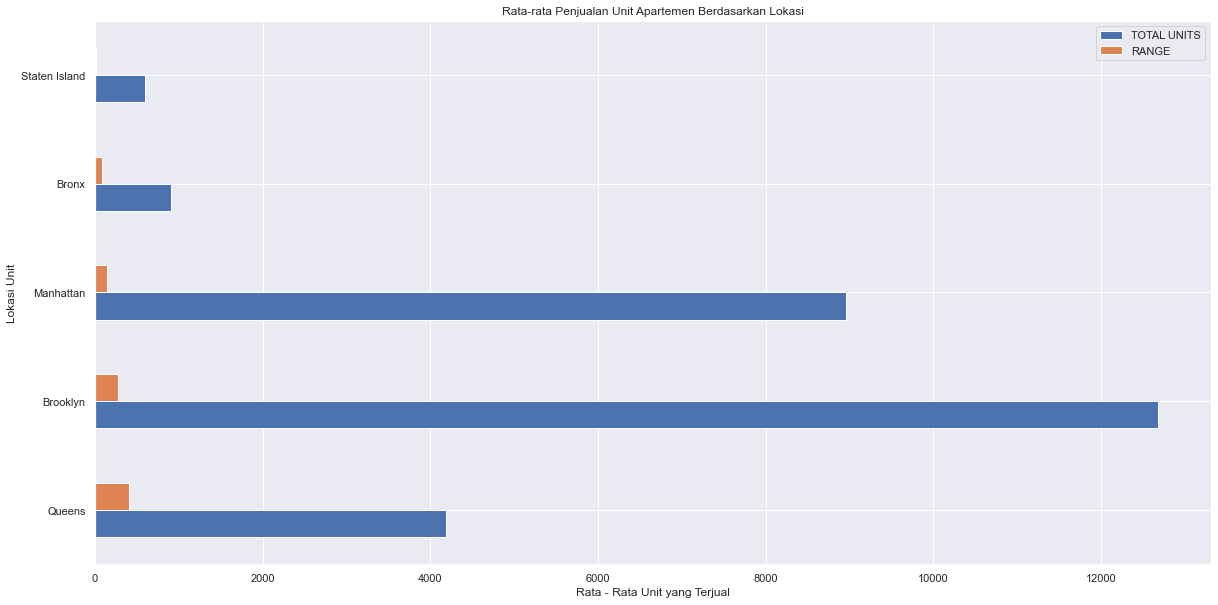

In [193]:
range.plot(kind = "barh", figsize = (20,10))
plt.title("Rata-rata Penjualan Unit Apartemen Berdasarkan Lokasi")
plt.xlabel("Rata - Rata Unit yang Terjual")
plt.ylabel("Lokasi Unit")

In [194]:
range = df['TOTAL UNITS'].to_numpy()
np.ptp(range)

405

Wilayah dengan range tertinggi yaitu Queens, lalu diikuti dengan Brooklyn. Perbedaan nilai range untuk setiap wilayah yaitu 405.

### Variance

In [195]:
variance = pd.DataFrame(df.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].var(ddof = 1)) 
variance.sort_values(by='TOTAL UNITS', ascending=False, inplace=True)
variance

,TOTAL UNITS
BUILDING CLASS CATEGORY,
11A CONDO-RENTALS,10167.243322
10 COOPS - ELEVATOR APARTMENTS,1404.500000
17 CONDO COOPS,1130.250000
08 RENTALS - ELEVATOR APARTMENTS,844.331551
07 RENTALS - WALKUP APARTMENTS,57.580569
14 RENTALS - 4-10 UNIT,2.819991
02 TWO FAMILY DWELLINGS,0.204678
31 COMMERCIAL VACANT LAND,0.200000
01 ONE FAMILY DWELLINGS,0.076923


Text(0, 0.5, 'Kategori')

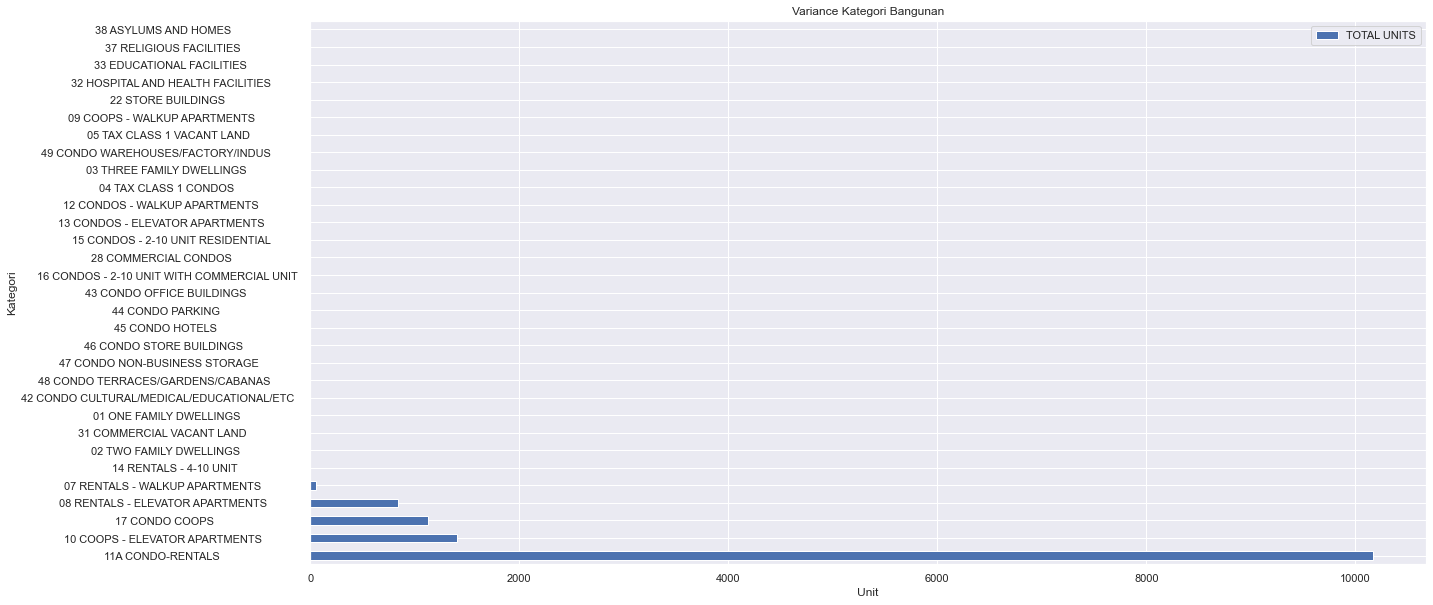

In [196]:
variance.plot(kind = "barh", figsize = (20,10))
plt.title("Variance Kategori Bangunan")
plt.xlabel("Unit")
plt.ylabel("Kategori")

In [236]:
variance = df['TOTAL UNITS'].to_numpy()
np.var(variance, ddof=1)

40.97296223713594

11A Condo-Rentals merupakan variance tertinggi dengan ukuran penyebaran data yang paling besar. Variance pada kesuluruhan kategori bangunan adalah 40.9.

### Standard Deviation 

In [197]:
sd = pd.DataFrame(df.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].var(ddof = 1)) 
sd.sort_values(by='TOTAL UNITS', ascending=False, inplace=True)
sd

,TOTAL UNITS
BUILDING CLASS CATEGORY,
11A CONDO-RENTALS,10167.243322
10 COOPS - ELEVATOR APARTMENTS,1404.500000
17 CONDO COOPS,1130.250000
08 RENTALS - ELEVATOR APARTMENTS,844.331551
07 RENTALS - WALKUP APARTMENTS,57.580569
14 RENTALS - 4-10 UNIT,2.819991
02 TWO FAMILY DWELLINGS,0.204678
31 COMMERCIAL VACANT LAND,0.200000
01 ONE FAMILY DWELLINGS,0.076923


Text(0.5, 1.0, 'SD Kategori Bangunan')

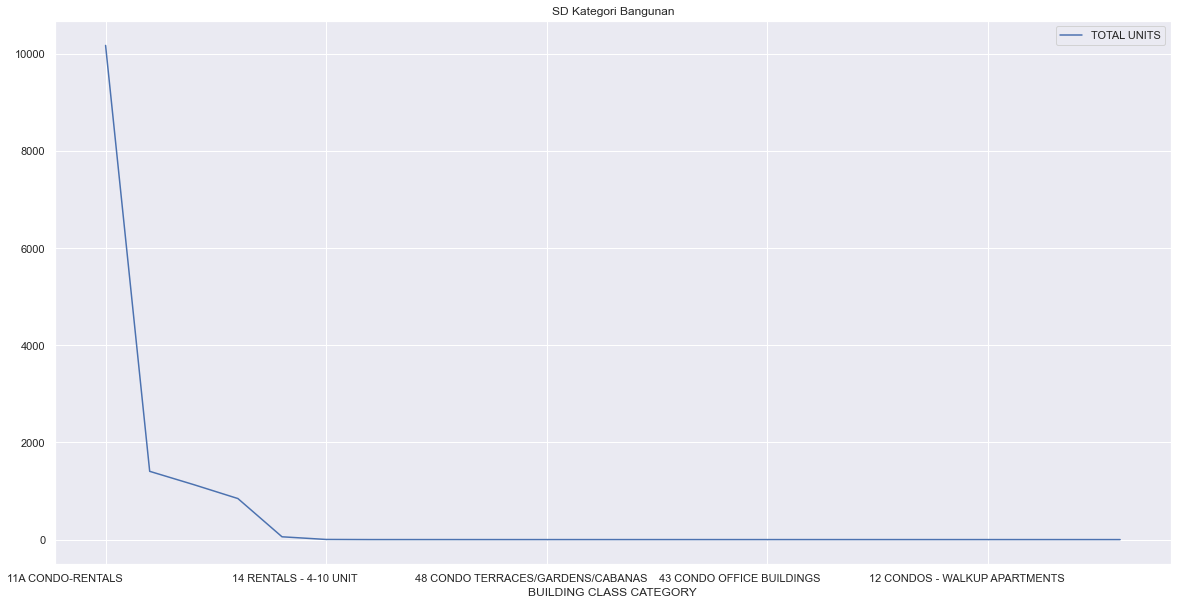

In [198]:
sd.plot(figsize=(20,10))
plt.title("SD Kategori Bangunan")

In [199]:
sd = df['TOTAL UNITS'].to_numpy()
np.std(sd,ddof=1)

6.401012594670935

Standart Deviasi tertinggi yaitu jatuh kepada bangunan 11A Condo - Rentals, dengan perbedaan Standar Deviasi setiap bangunan yaitu 6.4 .

### Probability Distribution 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Units'), Text(0, 0.5, 'Frequency')]

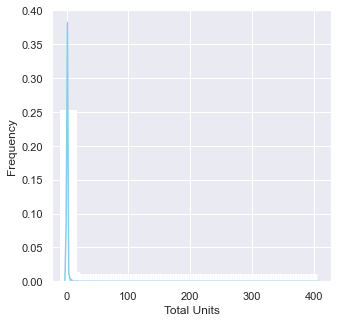

In [202]:
ax = sns.distplot(df['TOTAL UNITS'],
                 bins = 100,
                 kde = True,
                 color='skyblue',
                 hist_kws={'linewidth':15, 'alpha':1})
ax.set(xlabel="Total Units", ylabel="Frequency")

Data merupakan data continuous.

### Confidence Intervals 

In [203]:
df.groupby('BUILDING CLASS CATEGORY').agg({"TOTAL UNITS" : [np.mean, np.std, np.size]})

TOTAL UNITS                   
                                                    mean         std   size
BUILDING CLASS CATEGORY                                                    
01 ONE FAMILY DWELLINGS                         1.076923    0.277350     13
02 TWO FAMILY DWELLINGS                         2.263158    0.452414     19
03 THREE FAMILY DWELLINGS                       3.000000    0.000000     37
04 TAX CLASS 1 CONDOS                           1.000000    0.000000   1244
05 TAX CLASS 1 VACANT LAND                      0.000000         NaN      1
07 RENTALS - WALKUP APARTMENTS                  8.458333    7.588186    408
08 RENTALS - ELEVATOR APARTMENTS               57.176471   29.057384     34
09 COOPS - WALKUP APARTMENTS                    8.000000         NaN      1
10 COOPS - ELEVATOR APARTMENTS                 86.500000   37.476659      2
11A CONDO-RENTALS                              62.023810  100.832749     42
12 CONDOS - WALKUP APARTMENTS                   1.000000    0.000000    917
13 CONDOS - ELEVATOR APARTMENTS                 1.000000    0.000000  12328
14 RENTALS - 4-10 UNIT                          5.597015    1.679283     67
15 CONDOS - 2-10 UNIT RESIDENTIAL               1.000000    0.000000   1216
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1.000000    0.000000     94
17 CONDO COOPS                                 46.750000   33.619191      4
22 STORE BUILDINGS                              1.000000         NaN      1
28 COMMERCIAL CONDOS                            1.000000    0.000000     30
31 COMMERCIAL VACANT LAND                       0.800000    0.447214      5
32 HOSPITAL AND HEALTH FACILITIES               1.000000         NaN      1
33 EDUCATIONAL FACILITIES                       2.000000         NaN      1
37 RELIGIOUS FACILITIES                         1.000000         NaN      1
38 ASYLUMS AND HOMES                            1.000000         NaN      1
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC       1.000000    0.000000     12
43 CONDO OFFICE BUILDINGS                       1.000000    0.000000    456
44 CONDO PARKING                                1.000000    0.000000   1335
45 CONDO HOTELS                                 1.000000    0.000000    204
46 CONDO STORE BUILDINGS                        1.000000    0.000000    152
47 CONDO NON-BUSINESS STORAGE                   1.000000    0.000000    349
48 CONDO TERRACES/GARDENS/CABANAS               1.000000    0.000000     47
49 CONDO WAREHOUSES/FACTORY/INDUS               1.000000    0.000000     30

In [204]:
#Mengambil Data 01 ONE FAMILY DWELLINGS 
mean = 1.076923
sd = 0.277350
n = 13
z_score = 1.96

In [205]:
se = sd / np.sqrt(n)

In [207]:
lcb = mean - z_score * se
ucb = mean + z_score * se
lcb,ucb

(0.9261538225653941, 1.227692177434606)

Dikarenakan kita mengambil data 01 ONE FAMILY DWELLINGS , maka CI 01 ONE FAMILY DWELLINGS adalah 0.9261538225653941 - 1.227692177434606

### Hypothesis Testing 

#### Pearson's Correlation Coefficient



In [217]:
stat, p = pearsonr(df['TOTAL UNITS'], df['YEAR BUILT'])
print('stat=%.3f, p=%.3f' %(stat,p))
if p > 0.05:
    print("Independen")
else:
    print("Dependen")

stat=0.031, p=0.000
Dependen


Tidak memiliki relasi yang kuat dikarenakan, P memiliki value 0.

#### Spearman's Rank Correlation

In [218]:
stat, p = spearmanr(df['TOTAL UNITS'], df['YEAR BUILT'])
print('stat = %.3f, p=%.3f'% (stat,p))
if p > 0.05:
    print("Independen")
else:
    print("Dependen")

stat = -0.106, p=0.000
Dependen


Tidak memiliki relasi yang kuat dikarenakan, P memiliki value 0.

Text(0.5, 1.0, 'Variable Correlation')

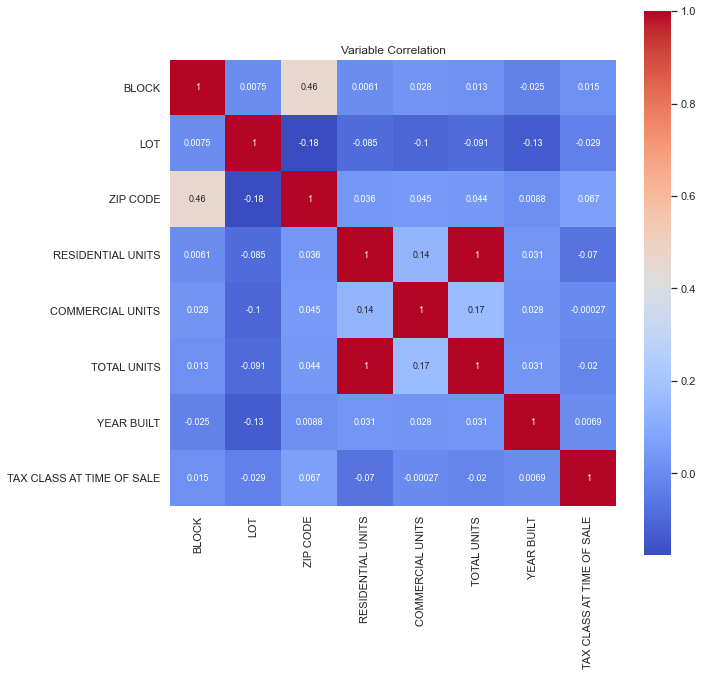

In [220]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')